<a href="https://colab.research.google.com/github/kamjelonek/Project_2_CLASS/blob/main/driver_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install catboost

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import lightgbm as lgb
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.manifold import TSNE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from mlxtend import plotting
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier

In [40]:
def Plot_3D(X,y,a,b,c):

  X_show = np.array(X)
  y_show = np.array(y)

  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)
  ax = plt.axes(projection='3d')
  ax.scatter3D(X_show[:, a], X_show[:, b], X_show[:, c],c=y_show, edgecolor="k")
  return plt.show()

def Feature_2D(X,y):

  model_tsne = TSNE(n_components=2)

  X_show = np.array(X)
  y_show = np.array(y)

  X_tse=model_tsne.fit_transform(X_show)

  x1=X_tse[:,0]
  x2=X_tse[:,1]

  plt.figure(figsize=(8,8))
  plt.scatter(x1,x2,c=y_show)
  plt.show()

def Matrix_Curve(model,X,y,model_name,matrix):

  train_sizes, train_scores, test_scores = learning_curve(model,X,y,
                                                          cv=10, scoring='f1_macro',
                                                          train_sizes=np.linspace(0.01, 1.0, 10))

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

  sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', ax=ax1,
              xticklabels=["Positive","Negative"],
              yticklabels=["Positive","Negative"])
  ax1.set_title(f"Confusion Matrix for {str(model_name)}")

  ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
  ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
  ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
  ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
  ax2.set_title(f'Learning Curve for ({str(model_name)})')
  ax2.set_xlabel('Number of Training Examples')
  ax2.set_ylabel('Accuracy')
  ax2.legend(loc='lower right')
  ax2.grid(True)

  plt.show()

In [7]:
df = pd.read_csv('acquiredDataset.csv')
df.head()

# Attenction - Proprietary measure of mental focus from 0-100
# meditation - Proprietary measure of calmness from 0-100
# delta - 1-3 Hz of power spectrum
# theta - 4-7 Hz of power spectrum
# lowAlpha - Lower 8-11 Hz of power spectrum
# highAlpha - Higher 8-11 Hz of power spectrum
# lowBeta - Lower 12-29 Hz of power spectrum
# highBeta - Higher 12-29 Hz of power spectrum
# lowGamma - Lower 30-100 Hz of power spectrum
# highGamma - Higher 30-100 Hz of power spectrum
# classification - (0-sleepy/1-awake?)

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [8]:
df.shape

(3735, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [10]:
df['classification'].unique()

array([0, 1])

In [11]:
print('Duplicate rows:')
print(df.duplicated().sum())

Duplicate rows:
0


In [12]:
df.nunique()


attention           60
meditation          60
delta             3724
theta             3680
lowAlpha          3601
highAlpha         3561
lowBeta           3573
highBeta          3494
lowGamma          3259
highGamma         3651
classification       2
dtype: int64

In [13]:
nany = df.isna().sum()
print("Liczba brakujących wartości:")
print(nany)

Liczba brakujących wartości:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


In [14]:
df.corr()

attention  meditation     delta     theta  lowAlpha  \
attention        1.000000    0.012465 -0.142241 -0.053082 -0.051414   
meditation       0.012465    1.000000 -0.075071 -0.081029  0.159976   
delta           -0.142241   -0.075071  1.000000  0.380921  0.363079   
theta           -0.053082   -0.081029  0.380921  1.000000  0.456296   
lowAlpha        -0.051414    0.159976  0.363079  0.456296  1.000000   
highAlpha        0.047367    0.015013  0.257987  0.656068  0.256059   
lowBeta          0.006725    0.009094  0.349557  0.344237  0.693183   
highBeta         0.166178    0.027394  0.225820  0.663608  0.437718   
lowGamma         0.059002   -0.097699  0.253741  0.285673  0.294094   
highGamma        0.032169    0.166853  0.287873  0.594448  0.444335   
classification   0.049283   -0.057642 -0.229921 -0.205588 -0.174786   

                highAlpha   lowBeta  highBeta  lowGamma  highGamma  \
attention        0.047367  0.006725  0.166178  0.059002   0.032169   
meditation       0.015013  0.009094  0.027394 -0.097699   0.166853   
delta            0.257987  0.349557  0.225820  0.253741   0.287873   
theta            0.656068  0.344237  0.663608  0.285673   0.594448   
lowAlpha         0.256059  0.693183  0.437718  0.294094   0.444335   
highAlpha        1.000000  0.271657  0.632582  0.281427   0.469033   
lowBeta          0.271657  1.000000  0.199992  0.403545   0.182727   
highBeta         0.632582  0.199992  1.000000  0.301577   0.650842   
lowGamma         0.281427  0.403545  0.301577  1.000000   0.027007   
highGamma        0.469033  0.182727  0.650842  0.027007   1.000000   
classification  -0.190926 -0.063340 -0.213560 -0.049076  -0.103819   

                classification  
attention             0.049283  
meditation           -0.057642  
delta                -0.229921  
theta                -0.205588  
lowAlpha             -0.174786  
highAlpha            -0.190926  
lowBeta              -0.063340  
highBeta             -0.213560  
lowGamma             -0.049076  
highGamma            -0.103819  
classification        1.000000

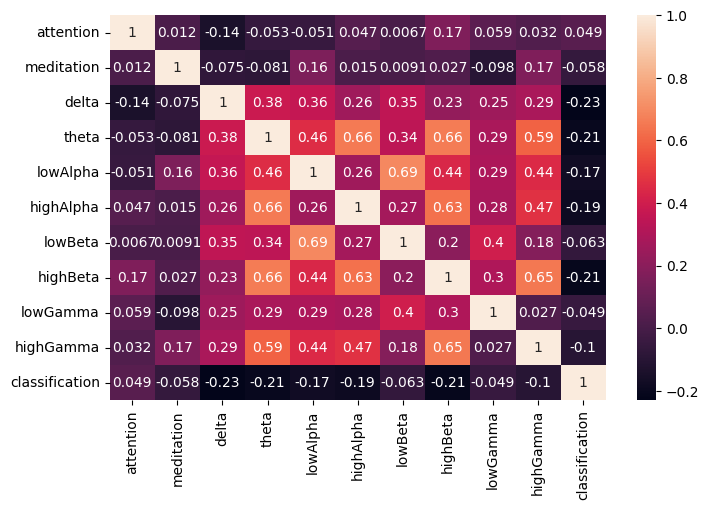

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
#from pandas.profiling import ProfileReport

In [17]:
#profile = ProfileReport(df)
#profile

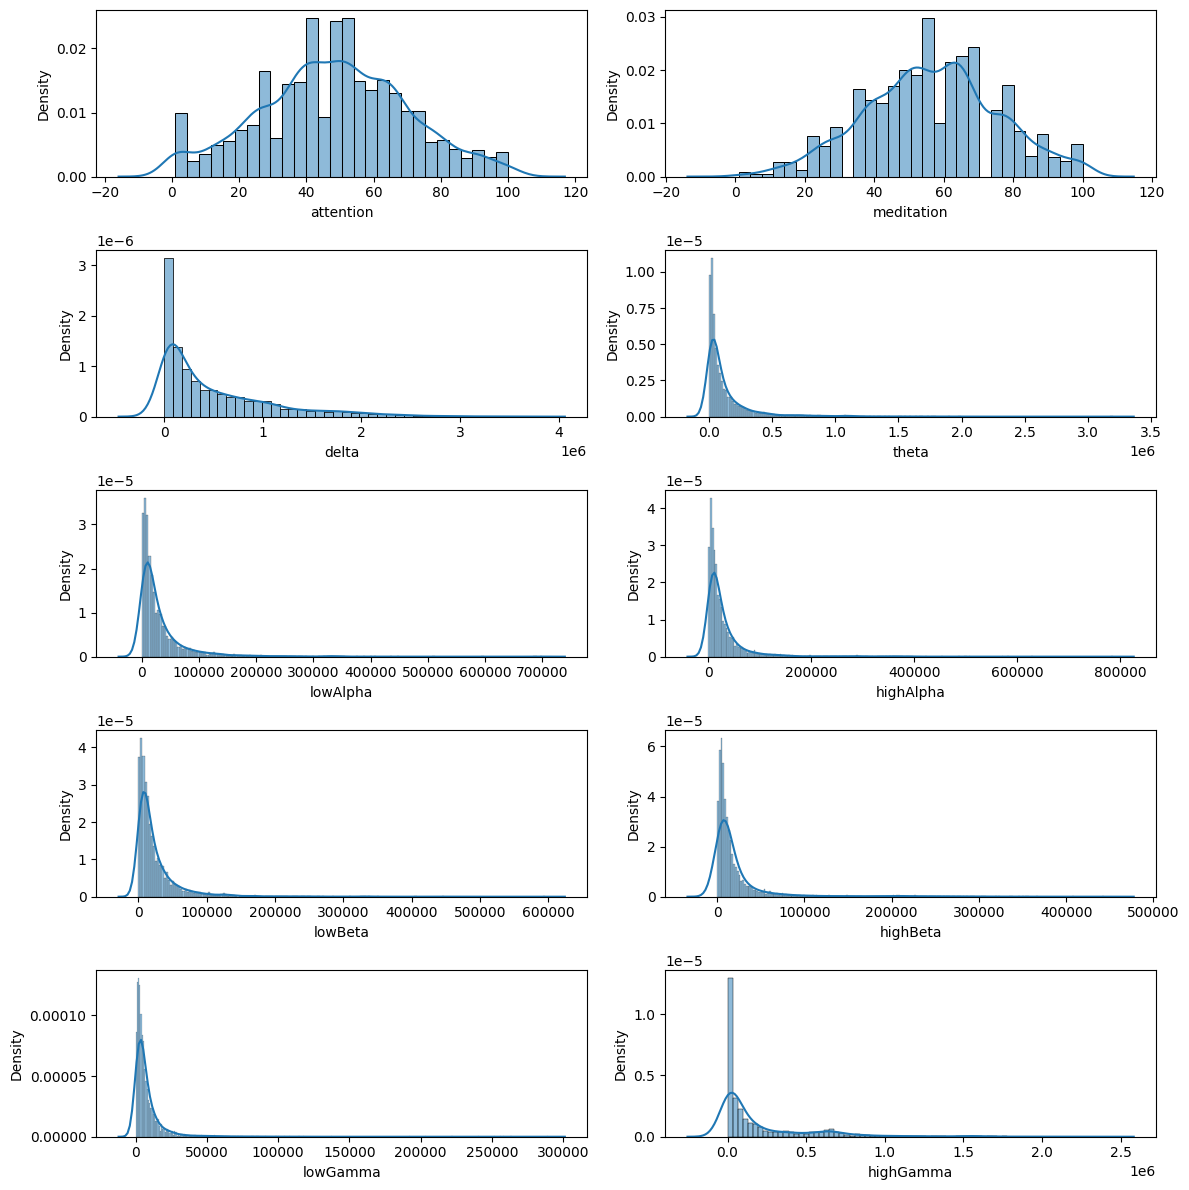

In [18]:
cols = list(df.columns)[0:len(df.columns)-1]
rows_plot = 5
cols_plot = 2
counter = 1
plt.rcParams["figure.figsize"] = [12, 12]
for col in cols:
    plt.subplot(rows_plot, cols_plot, counter)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=4))
    counter += 1
plt.tight_layout()
plt.show()

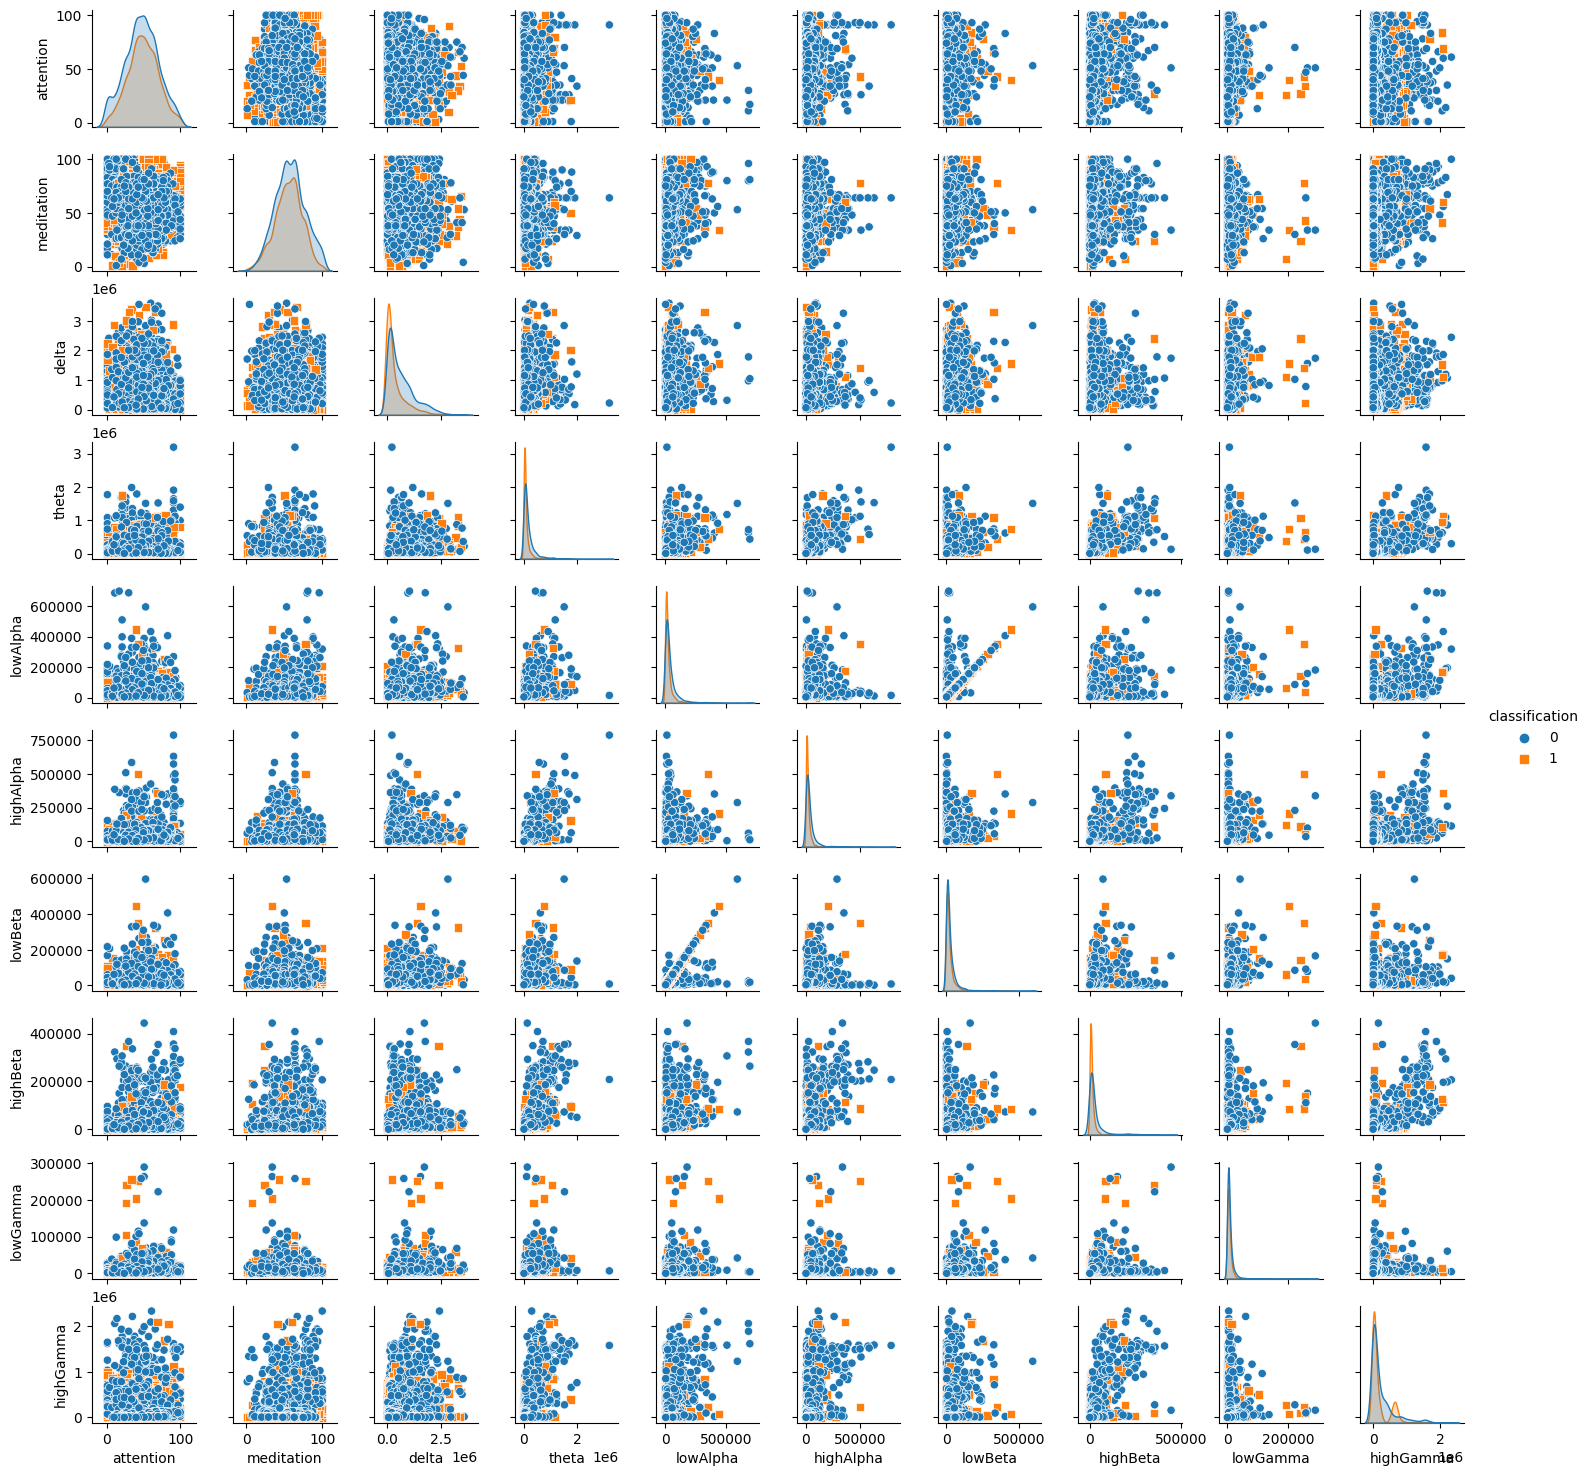

In [20]:
_ = sns.pairplot(df, hue='classification', diag_kind='kde', markers=['o', 's'], height=1.5, aspect=1)

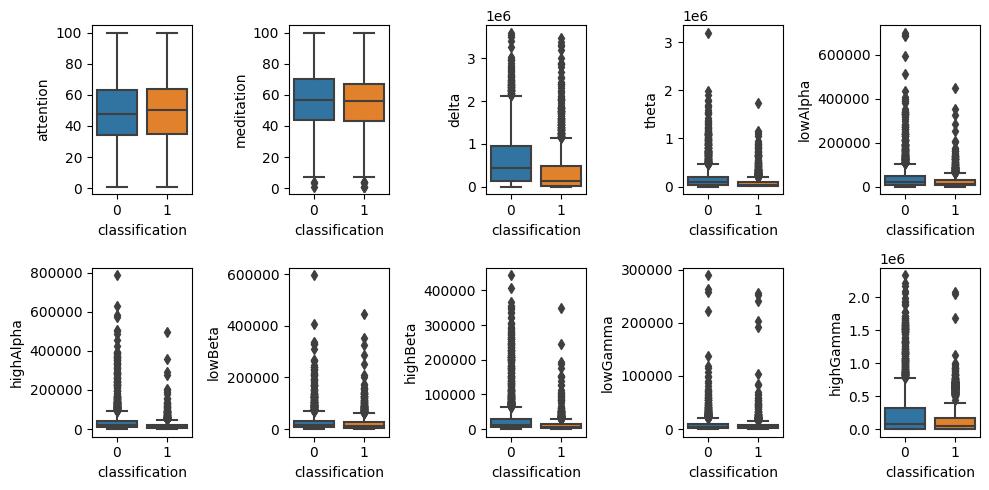

In [21]:
rows_plot=2
cols_plot=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for col in cols:
    plt.subplot(rows_plot,cols_plot,counter)
    sns.boxplot(x='classification',y=col,data=df)
    counter+=1

plt.tight_layout()
plt.show()

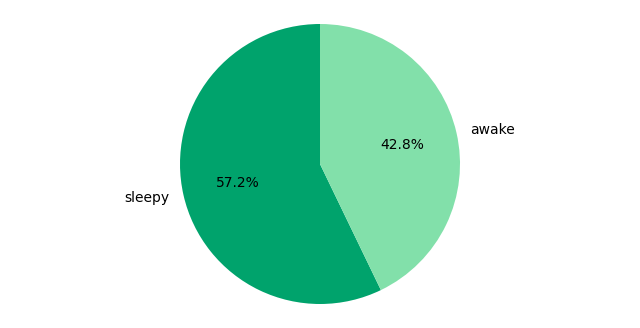

In [22]:
plt.figure(figsize=(8, 4))
plt.pie(df['classification'].value_counts(), labels=['sleepy', 'awake'], autopct='%1.1f%%', startangle=90, colors = ['#00A36C', '#82E0AA'])
plt.axis('equal')
plt.show()

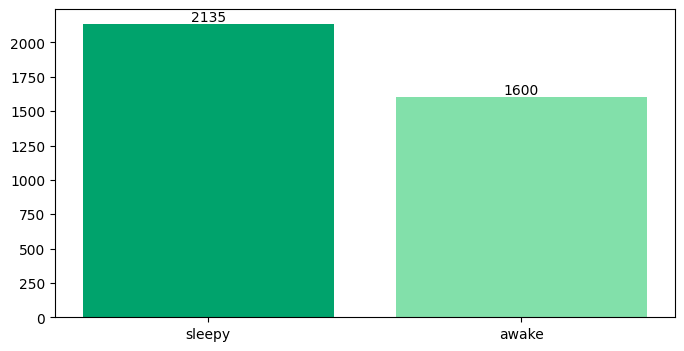

In [23]:
plt.figure(figsize=(8, 4))
ax = plt.gca()
bars = plt.bar(['sleepy', 'awake'], df['classification'].value_counts(), color=['#00A36C', '#82E0AA'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom')

Text(0.5, 1.0, 'Sleepy/Awake vs Different Wave Frequency')

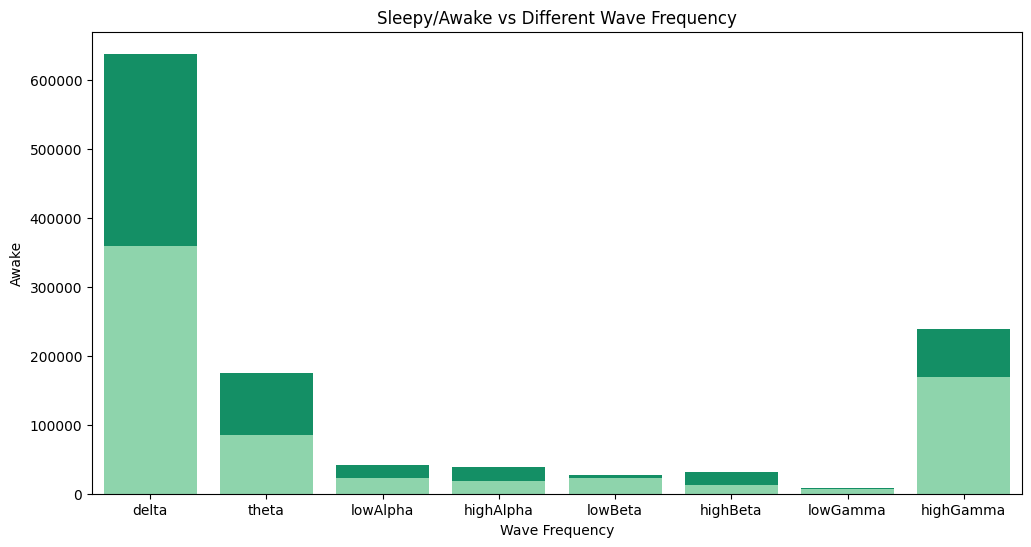

In [24]:
state_means = df.groupby('classification')[['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']].mean()

state_means = state_means.T.reset_index()

state_means.columns = ['Wave Frequency', 'Sleepy', 'Awake']

state_band = ['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']

state_means = state_means[state_means['Wave Frequency'].isin(state_band)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Wave Frequency', y='Sleepy', data=state_means, color='#00A36C', label='Sleepy')
sns.barplot(x='Wave Frequency', y='Awake', data=state_means, color='#82E0AA', label='Awake')
plt.title('Sleepy/Awake vs Different Wave Frequency')

# Inżynieria cech

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


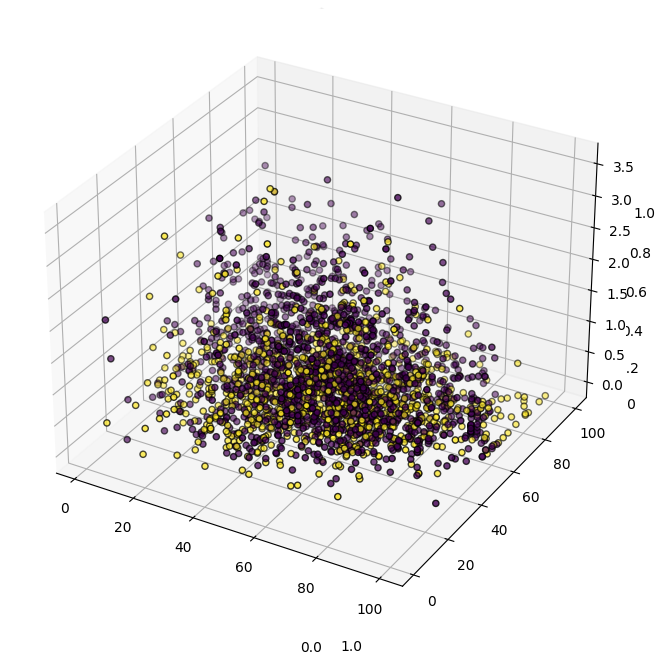

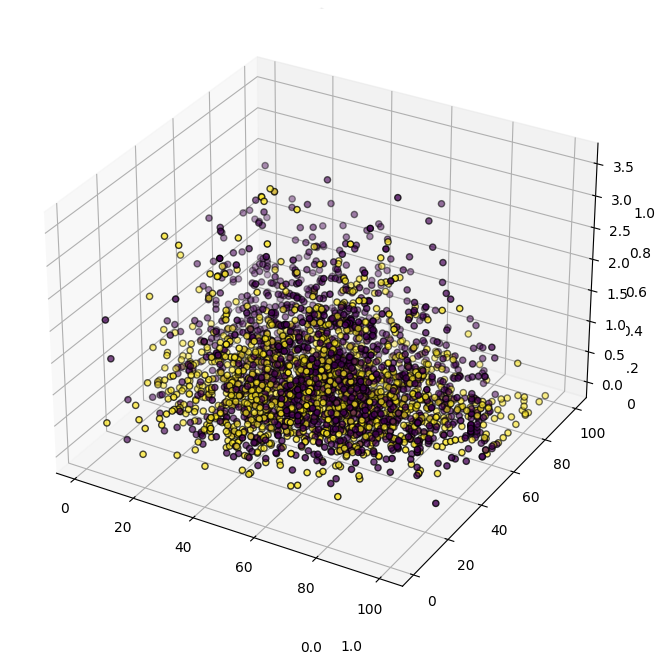

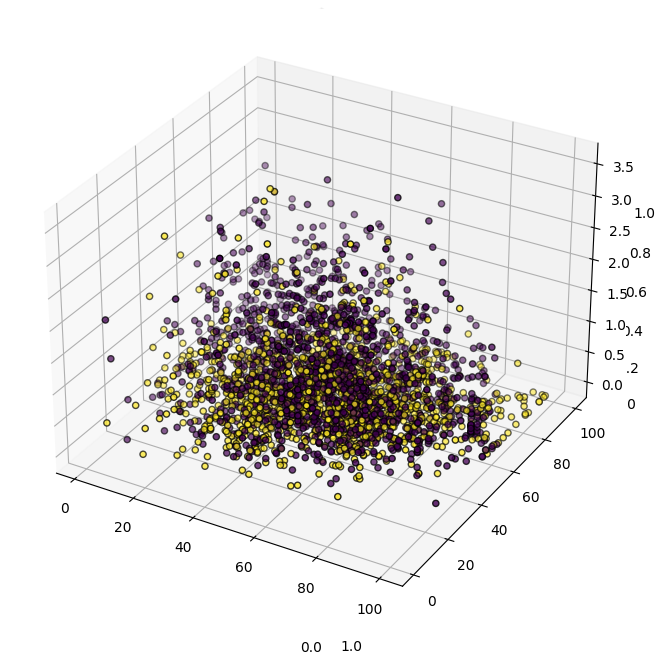

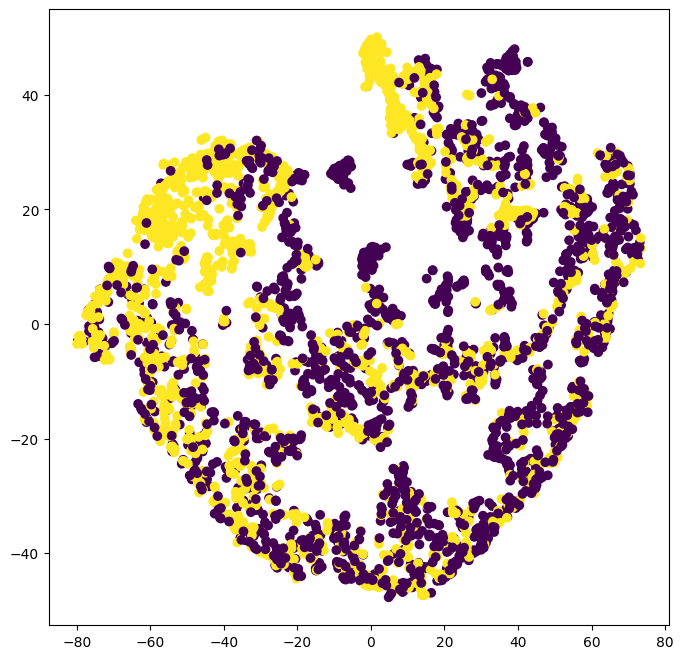

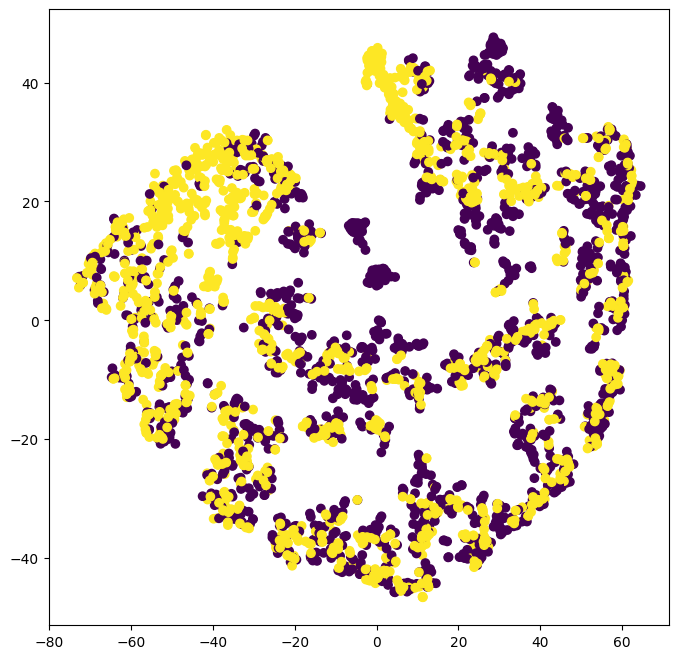

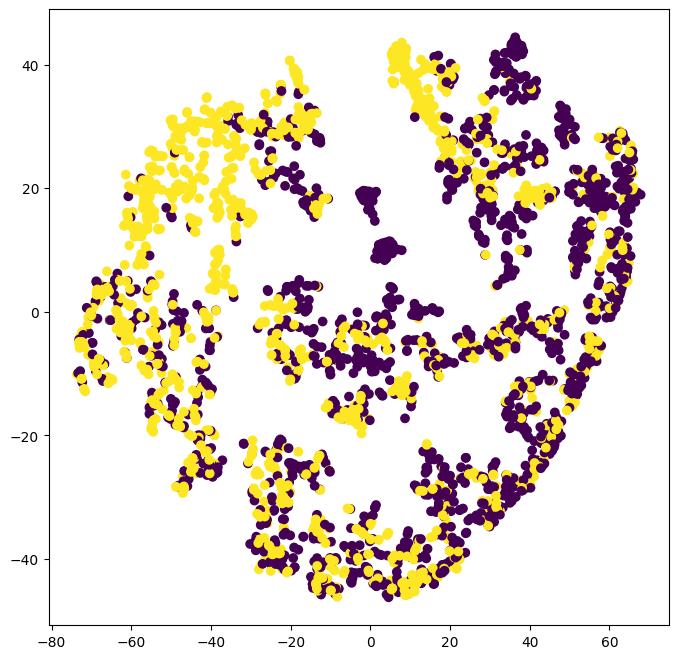

In [36]:
ada = ADASYN(sampling_strategy='minority', random_state=42)
km = KMeansSMOTE(random_state=42)

X = df.drop(columns = ['classification'])
y = df['classification']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)
X_train_km, y_train_km = km.fit_resample(X_train,y_train)

Plot_3D(X_train,y_train,0,1,2)
Plot_3D(X_train_ada,y_train_ada,0,1,2)
Plot_3D(X_train_km,y_train_km,0,1,2)
Feature_2D(X,y)
Feature_2D(X_train_ada,y_train_ada)
Feature_2D(X_train_km,y_train_km)

# KNN

In [38]:
params = {"n_neighbors": [3,5,7,9,11],
          "algorithm": ["ball_tree","kd_tree","brute"],
          "leaf_size": [15,30,45],
          "p": [1,2]}

gs_km = GridSearchCV(KNeighborsClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring="f1_macro")

gs_km.fit(X_train_km,y_train_km)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30, 45],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]},
             scoring='f1_macro')

Accuracy score: 0.6918238993710691
Precision score: 0.6266666666666667
Recall score: 0.6911764705882353
matt_score: 0.38006012860791655
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       273
           1       0.63      0.69      0.66       204

    accuracy                           0.69       477
   macro avg       0.69      0.69      0.69       477
weighted avg       0.70      0.69      0.69       477



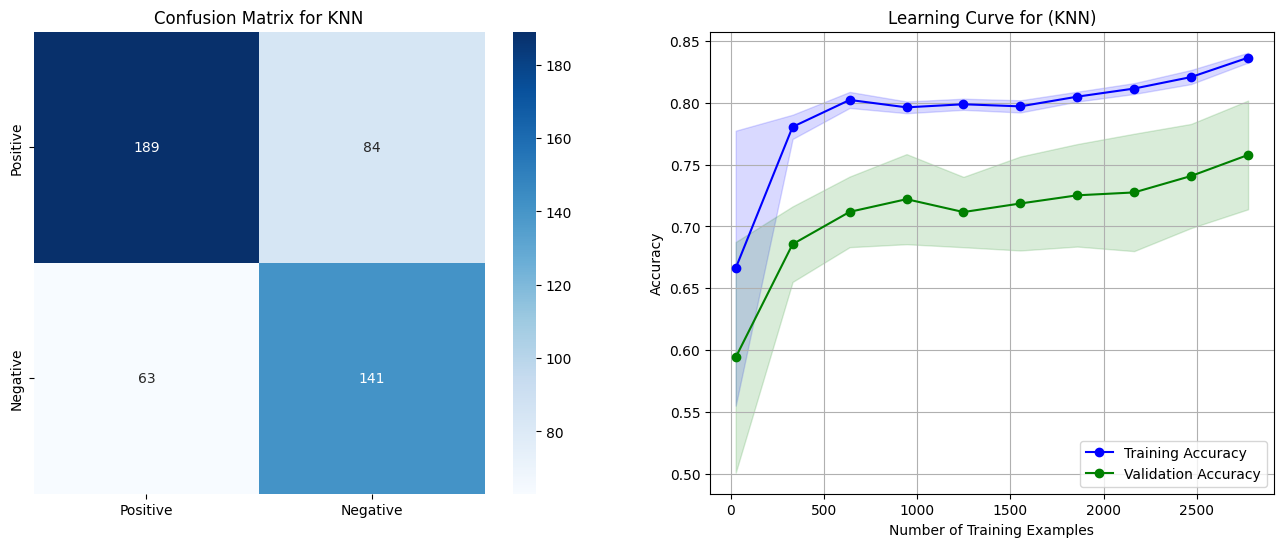

In [41]:
model_kn = KNeighborsClassifier(n_neighbors=gs_km.best_params_["n_neighbors"],
                                algorithm=gs_km.best_params_["algorithm"],
                                leaf_size=gs_km.best_params_["leaf_size"],
                                p=gs_km.best_params_["p"])

model_kn.fit(X_train_km, y_train_km)

y_pred_kn = model_kn.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_kn)}")
print(f"Precision score: {precision_score(y_val,y_pred_kn)}")
print(f"Recall score: {recall_score(y_val,y_pred_kn)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_kn)}")
matrix_kn = confusion_matrix(y_val,y_pred_kn)

print(classification_report(y_val,y_pred_kn))

Matrix_Curve(model_kn,X_train_km,y_train_km,KNN,matrix_kn)

# Random Forest

In [43]:
params_rf = {"n_estimators": [150,250],
          "criterion": ["gini","entropy"],
          "max_depth": [25,35],
          "min_samples_split": [5,15],
          "min_samples_leaf": [5,15]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=params_rf,
                  cv=10,
                  scoring="f1_macro",
                  verbose=2)

gs_rf.fit(X_train_ada,y_train_ada)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.8s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.6s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 35], 'min_samples_leaf': [5, 15],
                         'min_samples_split': [5, 15],
                         'n_estimators': [150, 250]},
             scoring='f1_macro', verbose=2)

In [44]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 250}

Accuracy score: 0.7651991614255765
Precision score: 0.7
Recall score: 0.7892156862745098
matt_score: 0.5311634526412982
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       273
           1       0.70      0.79      0.74       204

    accuracy                           0.77       477
   macro avg       0.76      0.77      0.76       477
weighted avg       0.77      0.77      0.77       477



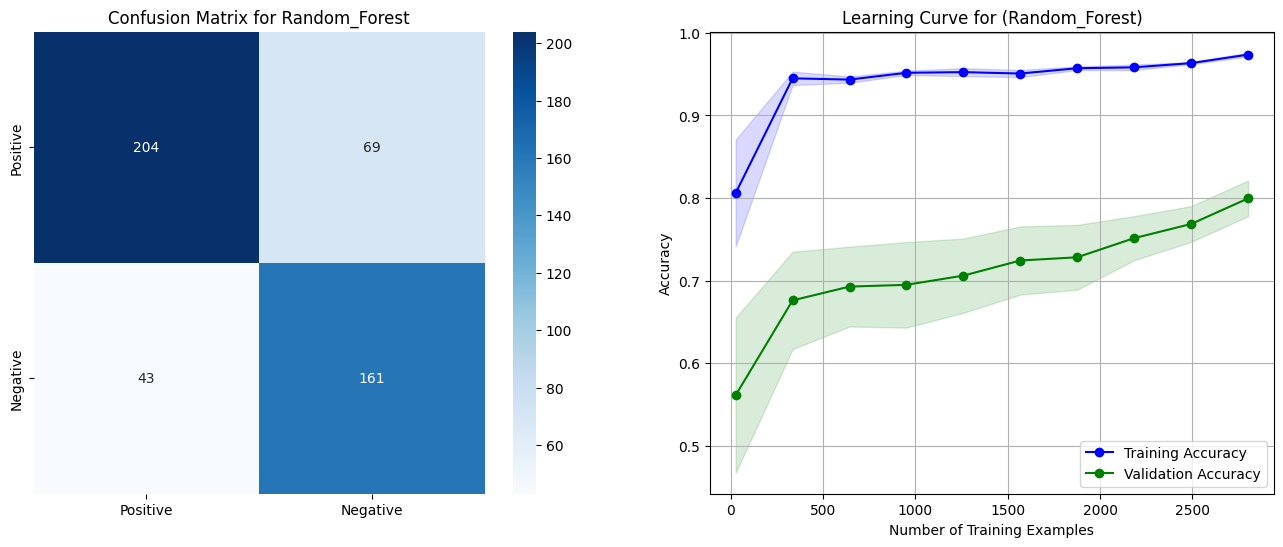

In [49]:
model_rf = RandomForestClassifier(criterion=gs_rf.best_params_['criterion'],
                                  max_depth=gs_rf.best_params_['max_depth'],
                                  min_samples_leaf=gs_rf.best_params_['min_samples_leaf'],
                                  min_samples_split=gs_rf.best_params_['min_samples_split'],
                                  n_estimators=gs_rf.best_params_['n_estimators'],
                                  random_state=42)

model_rf.fit(X_train_ada, y_train_ada)

y_pred_rf = model_rf.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_rf)}")
print(f"Precision score: {precision_score(y_val,y_pred_rf)}")
print(f"Recall score: {recall_score(y_val,y_pred_rf)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_rf)}")
matrix_rf = confusion_matrix(y_val,y_pred_rf)

print(classification_report(y_val,y_pred_rf))

Matrix_Curve(model_rf,X_train_ada,y_train_ada,str("Random_Forest"),matrix_rf)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

params_xgb = {"n_estimators": [150,250],
              "max_depth": [25,35],
              "learning_rate": [0.1,0.3,0.8],}

gs_xgb = GridSearchCV(XGBClassifier(random_state=42,objective="binary:logistic",eval_metric="auc"),
                  param_grid=params_xgb,
                  cv=10,
                  scoring="f1_macro",
                  verbose=2)

gs_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=250; total time=   2.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.8],
                         'max_depth': [25, 35], 'n_estimators': [150, 250]},
             scoring='f1_macro', verbose=2)

In [ ]:
gs_xgb.best_params_

{'learning_rate': 0.3, 'max_depth': 35, 'n_estimators': 250}

Accuracy score: 0.8218181818181818
Precision score: 0.8040540540540541
Recall score: 0.8561151079136691
matt_score: 0.6447241309225041
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       272
           1       0.80      0.86      0.83       278

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0.82      0.82       550



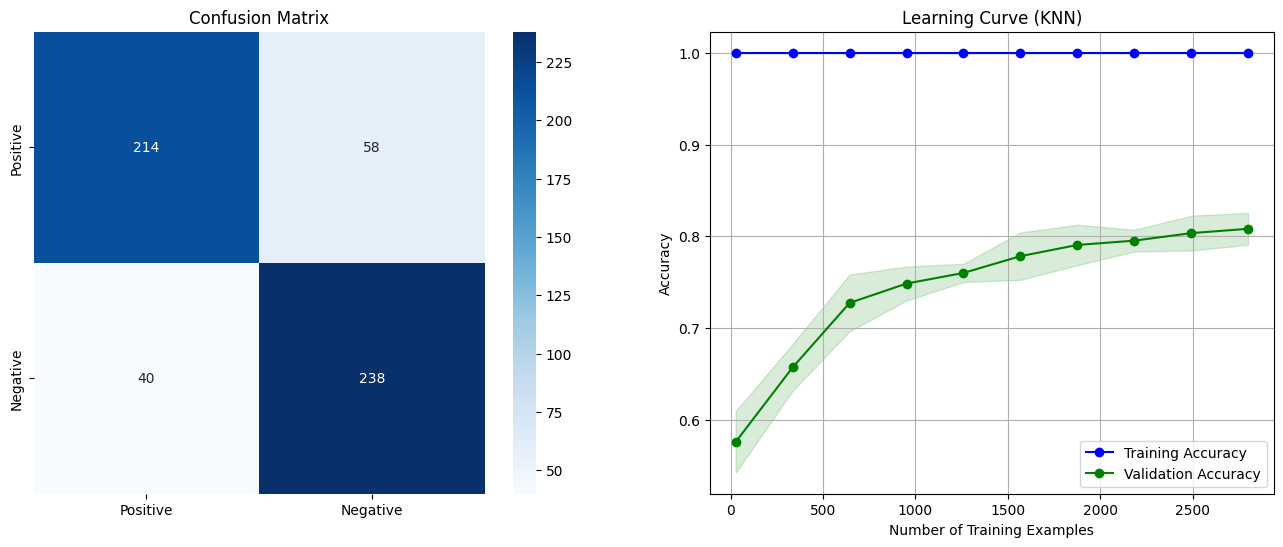

In [ ]:
model_xgb = XGBClassifier(max_depth=gs_xgb.best_params_["max_depth"],
                          n_estimators=gs_xgb.best_params_["n_estimators"],
                          learning_rate=gs_xgb.best_params_["learning_rate"],
                          objective="binary:logistic",
                          eval_metric="auc",
                          random_state=42,
                          subsample=0.8)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_xgb)}")
print(f"Precision score: {precision_score(y_val,y_pred_xgb)}")
print(f"Recall score: {recall_score(y_val,y_pred_xgb)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_xgb)}")
matrix_xgb = confusion_matrix(y_val,y_pred_xgb)

print(classification_report(y_val,y_pred_xgb))

train_sizes, train_scores, test_scores = learning_curve(model_xgb,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_xgb, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## Drzewo decyzyjne

In [ ]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=3,criterion='gini').fit(X_train, y_train)

[Text(0.5, 0.875, 'x[7] <= 26342.5\ngini = 0.5\nsamples = 3112\nvalue = [1542, 1570]'),
 Text(0.25, 0.625, 'x[9] <= 520318.5\ngini = 0.493\nsamples = 2530\nvalue = [1112, 1418]'),
 Text(0.125, 0.375, 'x[9] <= 271975.0\ngini = 0.499\nsamples = 2293\nvalue = [1090, 1203]'),
 Text(0.0625, 0.125, 'gini = 0.493\nsamples = 2142\nvalue = [948, 1194]'),
 Text(0.1875, 0.125, 'gini = 0.112\nsamples = 151\nvalue = [142, 9]'),
 Text(0.375, 0.375, 'x[1] <= 95.0\ngini = 0.168\nsamples = 237\nvalue = [22, 215]'),
 Text(0.3125, 0.125, 'gini = 0.143\nsamples = 233\nvalue = [18, 215]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.625, 'x[9] <= 95435.5\ngini = 0.386\nsamples = 582\nvalue = [430, 152]'),
 Text(0.625, 0.375, 'x[2] <= 46646.5\ngini = 0.497\nsamples = 205\nvalue = [110, 95]'),
 Text(0.5625, 0.125, 'gini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.6875, 0.125, 'gini = 0.48\nsamples = 182\nvalue = [109, 73]'),
 Text(0.875, 0.375, 'x[6] <= 26199.0\ngini 

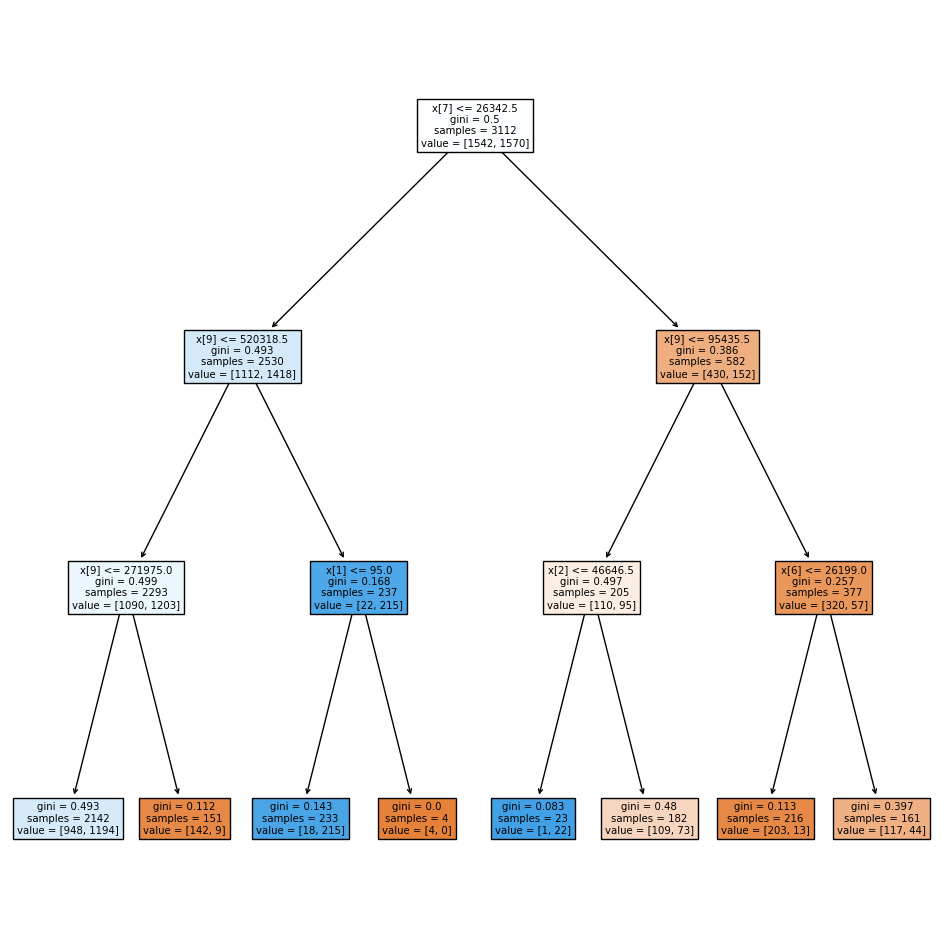

In [ ]:
plot_tree(d_tree,filled=True)

In [ ]:
d_tree.feature_importances_

array([0.        , 0.0247006 , 0.04646947, 0.        , 0.        ,
       0.        , 0.03090349, 0.31268674, 0.        , 0.58523969])

In [ ]:
y_pred_tree = d_tree.predict(X_test)

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [ ]:
report_tree = classification_report(y_test, y_pred_tree)

In [ ]:
Scores_tree = {'Accuracy':round(accuracy_score(y_test, y_pred_tree),3),
          'F1_score':round(f1_score(y_test, y_pred_tree),3),
          'Recall':round(recall_score(y_test, y_pred_tree),3),
          'Precision':round(precision_score(y_test, y_pred_tree),3)}
df_tree=pd.DataFrame(data=Scores_tree,index=['DecisionTree'])
df_tree

Accuracy  F1_score  Recall  Precision
DecisionTree     0.645     0.727   0.939      0.593

Accuracy TREE: 0.6445131375579598
Classification Report TREE:
               precision    recall  f1-score   support

           0       0.85      0.35      0.49       321
           1       0.59      0.94      0.73       326

    accuracy                           0.64       647
   macro avg       0.72      0.64      0.61       647
weighted avg       0.72      0.64      0.61       647

Confusion Matrix TREE:
 [[111 210]
 [ 20 306]]


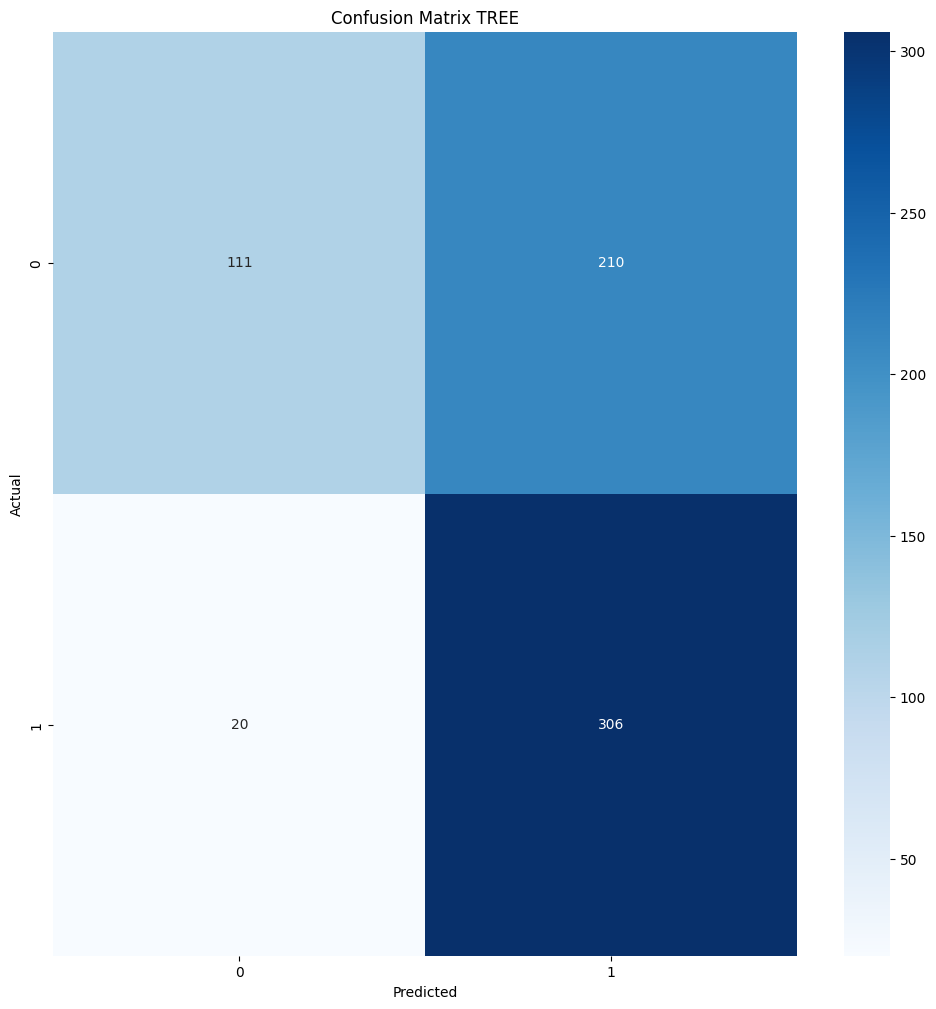

In [ ]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print(f'Accuracy TREE: {accuracy_tree}')
print('Classification Report TREE:\n', report_tree)
print('Confusion Matrix TREE:\n', conf_matrix_tree)

sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix TREE')
plt.show()

## ROC

0.9926743331102795
0.8623836553714428


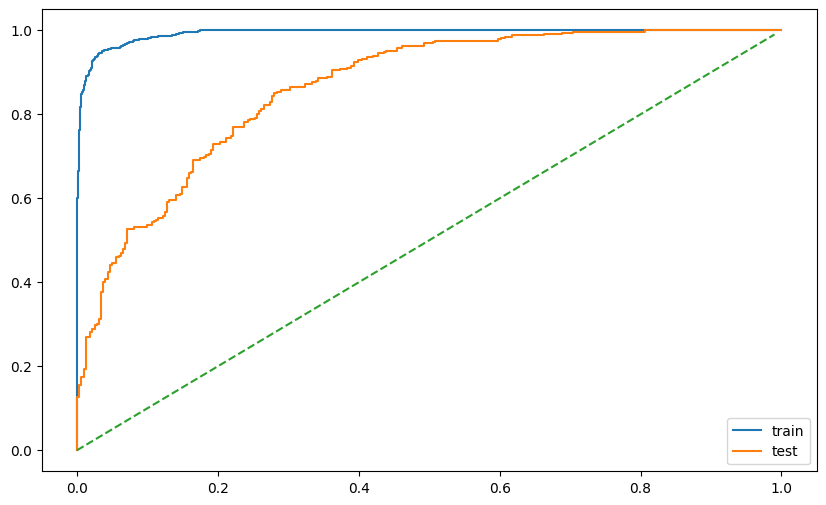

In [ ]:
pred_train_proba = rf_classifier.predict_proba(X_train)[:,1]
pred_test_proba = rf_classifier.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,pred_train_proba))
print(roc_auc_score(y_test,pred_test_proba))

fpr_train, tpr_train, thresholds =roc_curve(y_train, pred_train_proba)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, pred_test_proba)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr_train,tpr_train, label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.legend()
plt.show()

In [ ]:
#leaf
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,50,1):
    tree_1_classifier = DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_leaf_nodes=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

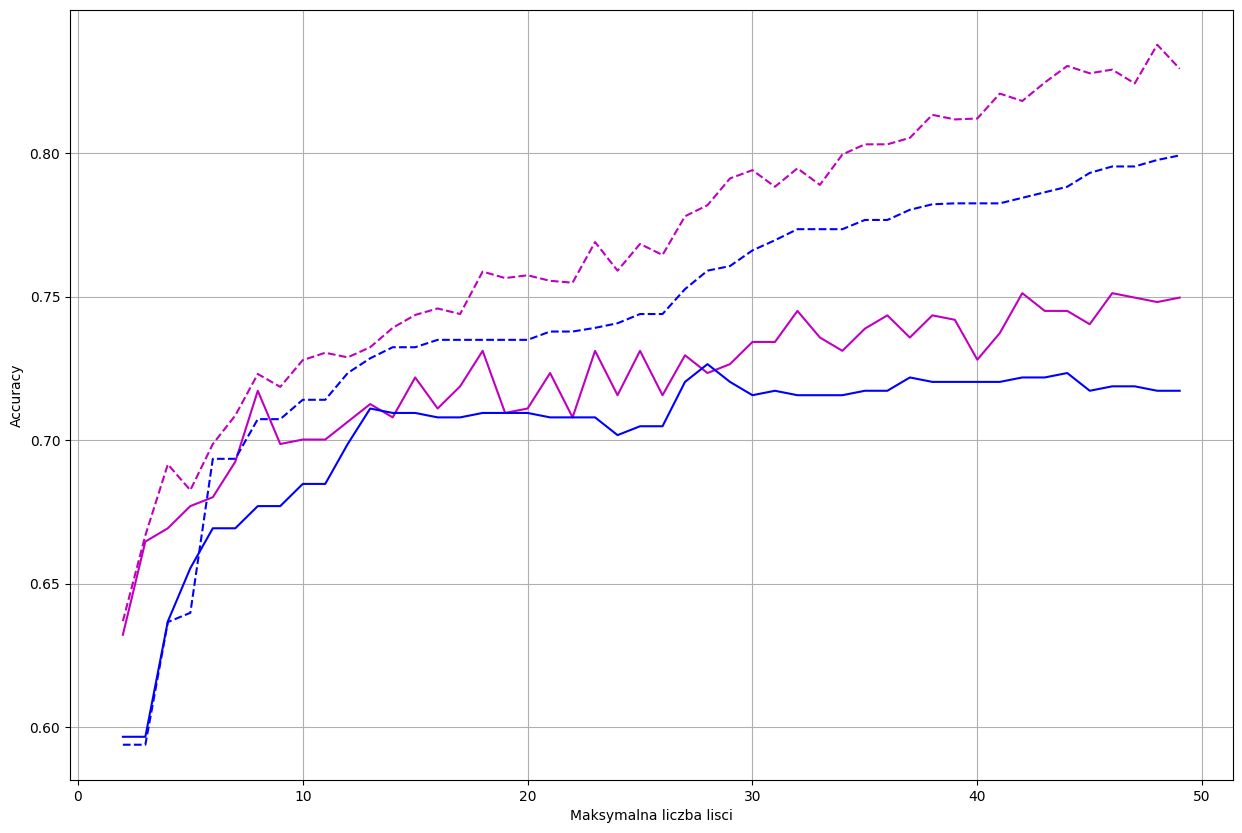

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna liczba lisci')
plt.ylabel('Accuracy')

plt.plot(range(2,50,1), rf_train_scores,'m--')
plt.plot(range(2,50,1), rf_test_scores, 'm')
plt.plot(range(2,50,1), tree_train_scores, 'b--')
plt.plot(range(2,50,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [ ]:
#max_deph

tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,15,1):
    tree_1_classifier = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_depth=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

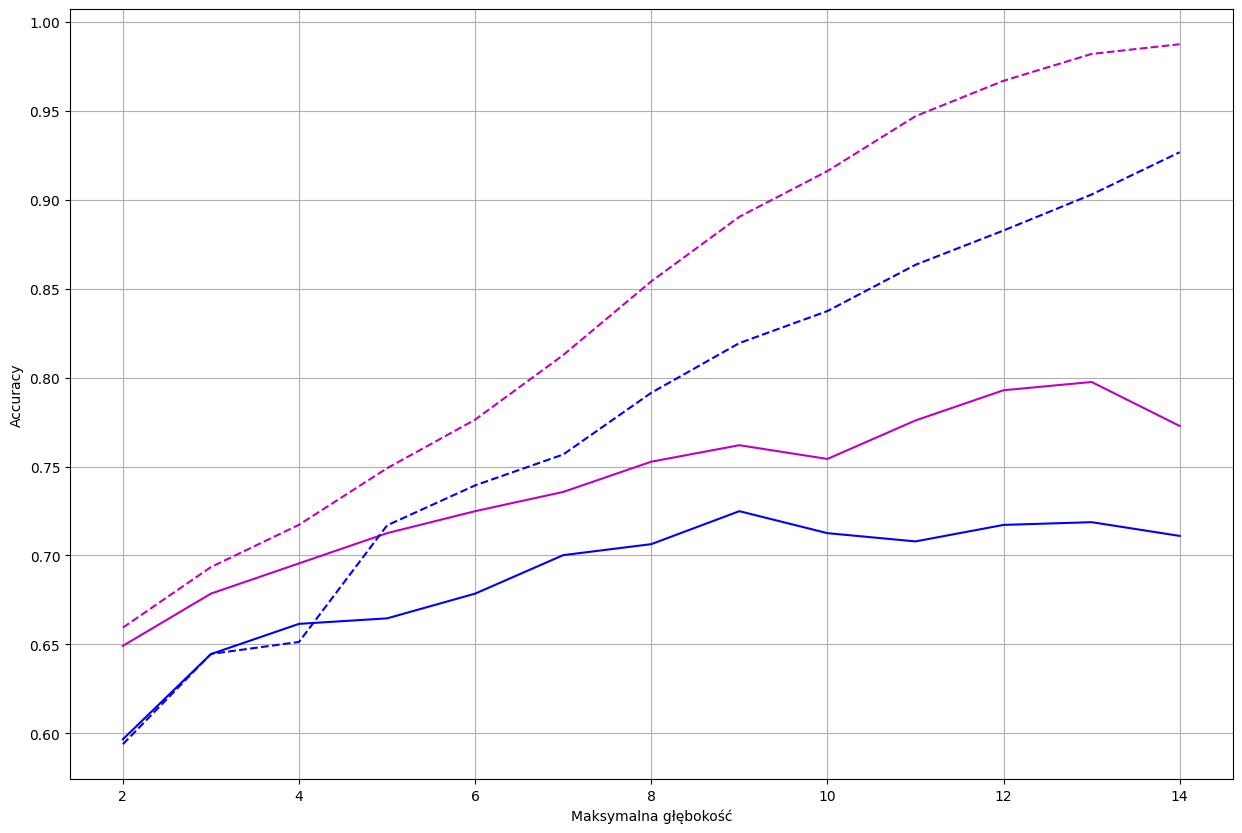

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna głębokość')
plt.ylabel('Accuracy')

plt.plot(range(2,15,1), rf_train_scores,'m--')
plt.plot(range(2,15,1), rf_test_scores, 'm')
plt.plot(range(2,15,1), tree_train_scores, 'b--')
plt.plot(range(2,15,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [ ]:
model = RandomForestClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Najlepsze parametry: ', best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Najlepsze parametry:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
brf_classifier = grid_search.best_estimator_

In [ ]:
brf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30)

In [ ]:
y_brf_pred = brf_classifier.predict(X_test)

In [ ]:
accuracy_brf = accuracy_score(y_test, y_brf_pred)

In [ ]:
report_brf = classification_report(y_test, y_brf_pred)

Accuracy BRF: 0.7774343122102009
Classification Report BRF:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       321
           1       0.79      0.83      0.81       326

    accuracy                           0.80       647
   macro avg       0.80      0.80      0.80       647
weighted avg       0.80      0.80      0.80       647

Confusion Matrix BRF:
 [[251  70]
 [ 57 269]]


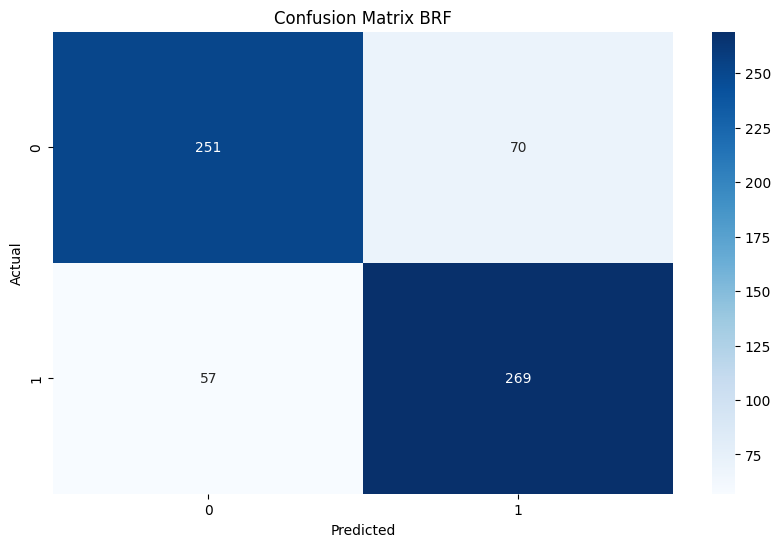

In [ ]:
conf_matrix_brf = confusion_matrix(y_test, y_brf_pred)

print(f'Accuracy BRF: {accuracy_rf}')
print('Classification Report BRF:\n', report_brf)
print('Confusion Matrix BRF:\n', conf_matrix_brf)

sns.heatmap(conf_matrix_brf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BRF')
plt.show()

## EXTRA TREES CLASSIFIER

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

ext_clf = ExtraTreesClassifier()

grid_search = GridSearchCV(estimator=ext_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'bootstrap': False, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_ext_clf = grid_search.best_estimator_
ext_clf_pred = best_ext_clf.predict(X_val)

In [ ]:
ext_clf_pred = best_ext_clf.predict(X_val)

In [ ]:
accuracy_ext_clf = accuracy_score(y_val, ext_clf_pred)

In [ ]:
report_ext_clf = classification_report(y_val, ext_clf_pred)

Accuracy ETC: 0.8072727272727273
Classification Report ETC:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       272
           1       0.79      0.84      0.81       278

    accuracy                           0.81       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550

Confusion Matrix ETC:
 [[211  61]
 [ 45 233]]


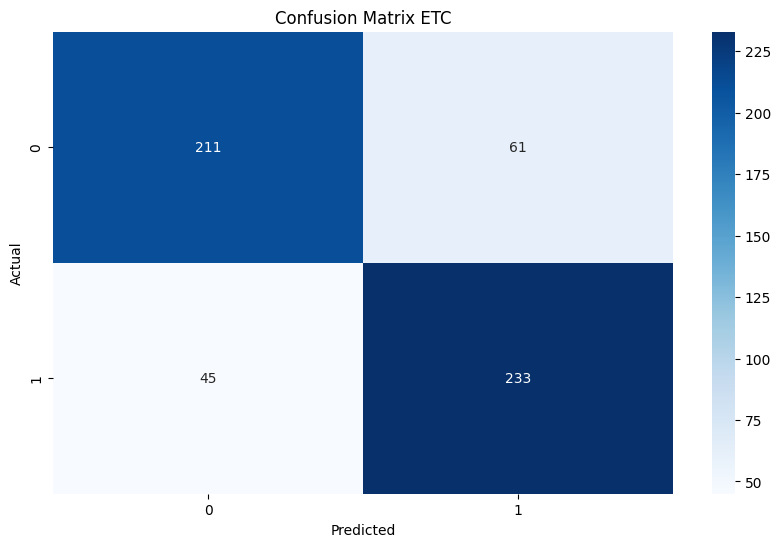

In [ ]:
conf_matrix_ext_clf = confusion_matrix(y_val, ext_clf_pred)

print(f'Accuracy ETC: {accuracy_ext_clf}')
print('Classification Report ETC:\n', report_ext_clf)
print('Confusion Matrix ETC:\n', conf_matrix_ext_clf)

sns.heatmap(conf_matrix_ext_clf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ETC')
plt.show()

In [ ]:
Scores_etc = {'Accuracy':round(accuracy_score(y_val, ext_clf_pred),3),
          'F1_score':round(f1_score(y_val, ext_clf_pred),3),
          'Recall':round(recall_score(y_val, ext_clf_pred),3),
          'Precision':round(precision_score(y_val, ext_clf_pred),3)}
df_etc=pd.DataFrame(data=Scores_etc,index=['ETC'])
df_etc

Accuracy  F1_score  Recall  Precision
ETC     0.807     0.815   0.838      0.793

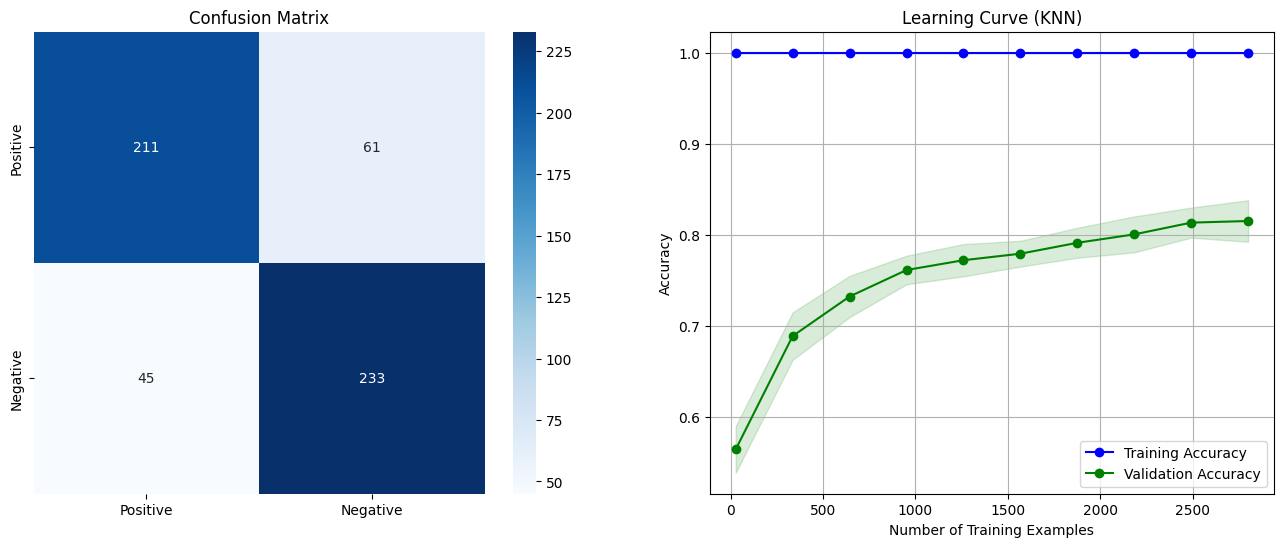

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_ext_clf,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(conf_matrix_ext_clf, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## CAT BOOST CLASSIFIER

In [ ]:
param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 6, 9],
    'border_count': [32, 64, 128],
    'random_strength': [0.5, 1],
    'one_hot_max_size': [2, 10]
}

catboost_class = CatBoostClassifier()

catboost = GridSearchCV(estimator = catboost_class, param_grid = param_grid, cv=3, scoring = 'accuracy')

In [ ]:
catboost.fit(X_train, y_train)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
9:	learn: 0.5040725	total: 87.2ms	remaining: 4.27s
10:	learn: 0.4935498	total: 96ms	remaining: 4.27s
11:	learn: 0.4880746	total: 105ms	remaining: 4.25s
12:	learn: 0.4778326	total: 113ms	remaining: 4.23s
13:	learn: 0.4691271	total: 122ms	remaining: 4.24s
14:	learn: 0.4626608	total: 131ms	remaining: 4.24s
15:	learn: 0.4524132	total: 140ms	remaining: 4.23s
16:	learn: 0.4444105	total: 150ms	remaining: 4.25s
17:	learn: 0.4380487	total: 158ms	remaining: 4.23s
18:	learn: 0.4337533	total: 167ms	remaining: 4.22s
19:	learn: 0.4246728	total: 175ms	remaining: 4.21s
20:	learn: 0.4179636	total: 190ms	remaining: 4.34s
21:	learn: 0.4136214	total: 202ms	remaining: 4.39s
22:	learn: 0.4076872	total: 211ms	remaining: 4.38s
23:	learn: 0.4015545	total: 219ms	remaining: 4.35s
24:	learn: 0.3941596	total: 228ms	remaining: 4.34s
25:	learn: 0.3879126	total: 237ms	remaining: 4.33s
26:	learn: 0.3831124	total: 248ms	remaining: 4.35s
27:	learn: 0.37911

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7a454f3e3df0>,
             param_grid={'border_count': [32, 64, 128], 'depth': [3, 6, 9],
                         'iterations': [100, 300, 500],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'one_hot_max_size': [2, 10],
                         'random_strength': [0.5, 1]},
             scoring='accuracy', verbose=2)

In [ ]:
catboost.best_params_

{'border_count': 64,
 'depth': 9,
 'iterations': 500,
 'learning_rate': 0.1,
 'one_hot_max_size': 2,
 'random_strength': 0.5}

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
0:	total: 3.81ms	remaining: 1.9s
1:	total: 7.89ms	remaining: 1.96s
2:	total: 13.5ms	remaining: 2.23s
3:	total: 20.4ms	remaining: 2.53s
4:	total: 27.8ms	remaining: 2.75s
5:	total: 30.7ms	remaining: 2.52s
6:	total: 32.8ms	remaining: 2.31s
7:	total: 35.8ms	remaining: 2.2s
8:	total: 45.2ms	remaining: 2.46s
9:	total: 50.5ms	remaining: 2.47s
10:	total: 58.9ms	remaining: 2.62s
11:	total: 62.9ms	remaining: 2.56s
12:	total: 71.5ms	remaining: 2.68s
13:	total: 76.7ms	remaining: 2.66s
14:	total: 80.1ms	remaining: 2.59s
15:	total: 82.2ms	remaining: 2.48s
16:	total: 86.6ms	remaining: 2.46s
17:	total: 93.7ms	remaining: 2.51s
18:	total: 101ms	remaining: 2.54s
19:	total: 108ms	remaining: 2.58s
20:	total: 118ms	remaining: 2.7s
21:	total: 123ms	remaining: 2.66s
22:	total: 130ms	remaining: 2.69s
23:	total: 137ms	remaining: 2.71s
24:	total: 145ms	remaining: 2.76s
25:	total: 154ms	remaining: 2.81s
26:	total: 163ms	remaining: 2.86s
27:	total: 1

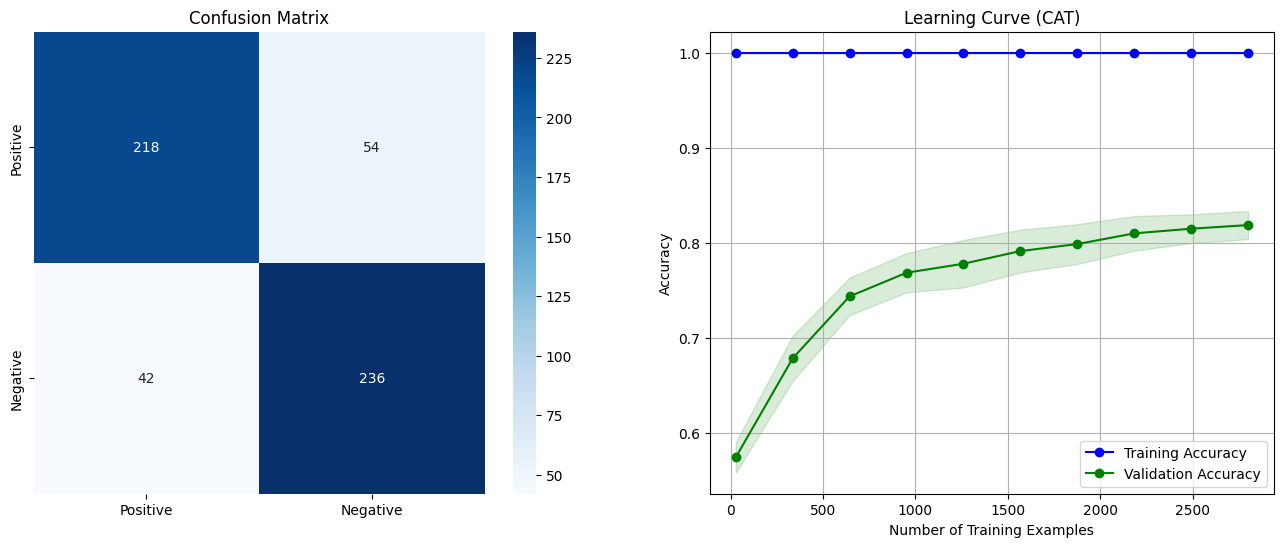

In [ ]:
model_cat = CatBoostClassifier(border_count=catboost.best_params_["border_count"],
                          depth=catboost.best_params_["depth"],
                          learning_rate=catboost.best_params_["learning_rate"],
                          iterations=catboost.best_params_["iterations"],
                          one_hot_max_size=catboost.best_params_["one_hot_max_size"],
                          random_strength=catboost.best_params_["random_strength"],
                          eval_metric="AUC",
                          random_state=42,
                          subsample=0.8)

model_cat.fit(X_train, y_train)

y_pred_cat = catboost.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_cat)}")
print(f"Precision score: {precision_score(y_val,y_pred_cat)}")
print(f"Recall score: {recall_score(y_val,y_pred_cat)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_cat)}")
matrix_cat = confusion_matrix(y_val,y_pred_cat)

print(classification_report(y_val,y_pred_cat))

train_sizes, train_scores, test_scores = learning_curve(model_cat,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_cat, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (CAT)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

In [ ]:
accuracy_cat = accuracy_score(y_val, y_pred_cat)

In [ ]:
report_cat = classification_report(y_val, y_pred_cat)

In [ ]:
print(f'Accuracy CAT: {accuracy_cat}')
print('Classification Report CAT:\n', report_cat)
print('Confusion Matrix CAT:\n', matrix_cat)

Accuracy CAT: 0.8254545454545454
Classification Report CAT:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       272
           1       0.81      0.85      0.83       278

    accuracy                           0.83       550
   macro avg       0.83      0.83      0.83       550
weighted avg       0.83      0.83      0.83       550

Confusion Matrix CAT:
 [[218  54]
 [ 42 236]]


## LIGHT GBM

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': len(y_train.unique()),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'sub_feature': 0.5,
    'num_leaves': 31,
    'min_data': 50,
    'max_depth': -1
}

d_train = lgb.Dataset(X_train, label = y_train)

In [ ]:
lgb = lgb.train(params, d_train, 100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2204
[LightGBM] [Info] Number of data points in the train set: 3112, number of used features: 10
[LightGBM] [Info] Start training from score -0.702185
[LightGBM] [Info] Start training from score -0.684190


In [ ]:
lgb_pred = lgb.predict(X_val)

In [ ]:
lgb_pred_max = [max(enumerate(val), key=lambda x: x[1])[0] for val in lgb_pred]

In [ ]:
accuracy_lgb = accuracy_score(y_val, lgb_pred_max)

In [ ]:
report_lgb = classification_report(y_val, lgb_pred_max)

Accuracy LGB: 0.7945454545454546
Classification Report LGB:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       272
           1       0.77      0.84      0.80       278

    accuracy                           0.79       550
   macro avg       0.80      0.79      0.79       550
weighted avg       0.80      0.79      0.79       550

Confusion Matrix LGB:
 [[204  68]
 [ 45 233]]


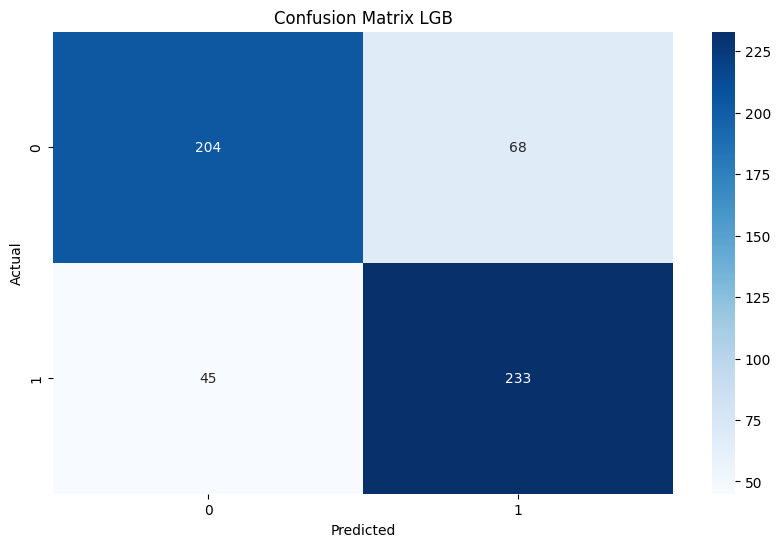

In [ ]:
conf_matrix_lgb = confusion_matrix(y_val, lgb_pred_max)

print(f'Accuracy LGB: {accuracy_lgb}')
print('Classification Report LGB:\n', report_lgb)
print('Confusion Matrix LGB:\n', conf_matrix_lgb)

sns.heatmap(conf_matrix_lgb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LGB')
plt.show()

In [ ]:
Scores_lgb = {'Accuracy':round(accuracy_score(y_val, lgb_pred_max),3),
          'F1_score':round(f1_score(y_val, lgb_pred_max),3),
          'Recall':round(recall_score(y_val, lgb_pred_max),3),
          'Precision':round(precision_score(y_val, lgb_pred_max),3)}
df_lgb=pd.DataFrame(data=Scores_etc,index=['LGB'])
df_lgb

Accuracy  F1_score  Recall  Precision
LGB     0.807     0.815   0.838      0.793

## ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

tree = RandomForestClassifier(max_depth = 10)
clf = AdaBoostClassifier(tree)
params = {
    'n_estimators' : [2,5,10,15,20],
    'learning_rate' : [0.01,0.1,1,10]
}
random_search = RandomizedSearchCV(clf, params, n_iter = 10, cv = 5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10)),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10],
                                        'n_estimators': [2, 5, 10, 15, 20]})

In [ ]:
random_search.best_params_

{'n_estimators': 10, 'learning_rate': 1}

In [ ]:
ada_classifier = AdaBoostClassifier(n_estimators = 15, learning_rate = 1)

In [ ]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=15)

In [ ]:
y_ada_pred = ada_classifier.predict(X_test)

In [ ]:
accuracy_ada = accuracy_score(y_test, y_ada_pred)

In [ ]:
report_ada = classification_report(y_test, y_ada_pred)

Accuracy ADA: 0.6831530139103554
Classification Report ADA:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68       321
           1       0.69      0.68      0.68       326

    accuracy                           0.68       647
   macro avg       0.68      0.68      0.68       647
weighted avg       0.68      0.68      0.68       647

Confusion Matrix ADA:
 [[221 100]
 [105 221]]


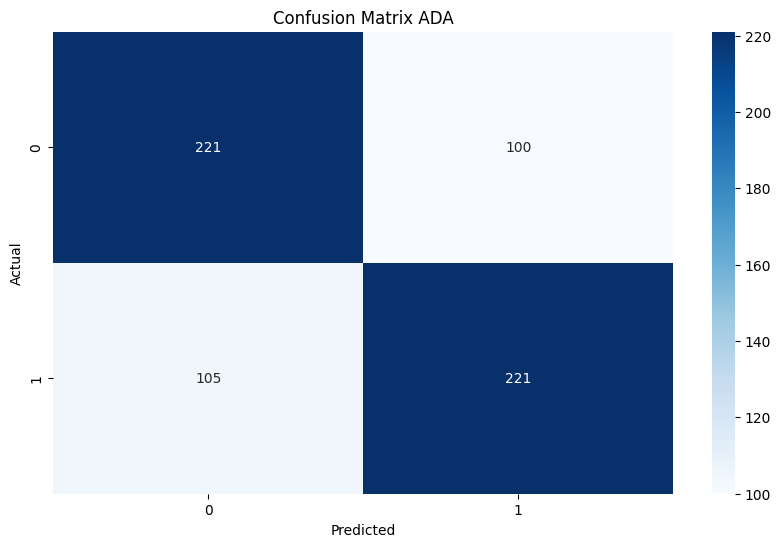

In [ ]:
conf_matrix_ada = confusion_matrix(y_test, y_ada_pred)

print(f'Accuracy ADA: {accuracy_ada}')
print('Classification Report ADA:\n', report_ada)
print('Confusion Matrix ADA:\n', conf_matrix_ada)

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ADA')
plt.show()

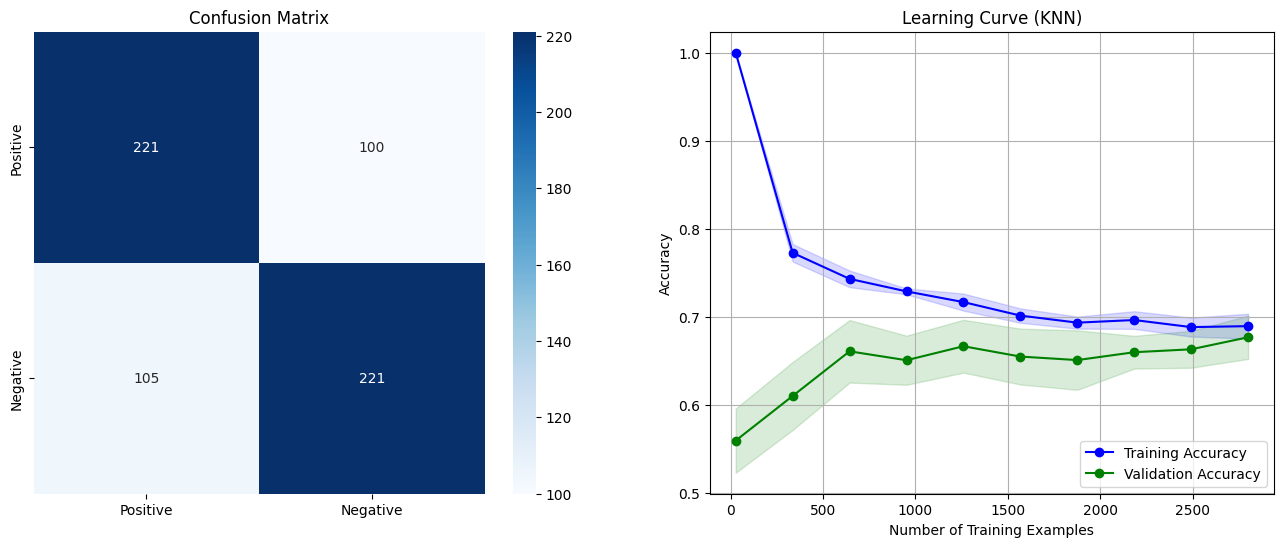

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(ada_classifier,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## SVM

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(C=1.0, kernel='rbf')

svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
y_svm_pred = svm_classifier.predict(X_val)

In [ ]:
svm_classifier.score(X_val, y_val)

0.7

In [ ]:
accuracy_svm = accuracy_score(y_val, y_svm_pred)

In [ ]:
report_svm = classification_report(y_val, y_svm_pred)

In [ ]:
Scores_svm = {'Accuracy':round(accuracy_score(y_val, y_svm_pred),3),
          'F1_score':round(f1_score(y_val, y_svm_pred),3),
          'Recall':round(recall_score(y_val, y_svm_pred),3),
          'Precision':round(precision_score(y_val, y_svm_pred),3)}
df_svm=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_svm

Accuracy  F1_score  Recall  Precision
SVM       0.7     0.729   0.799      0.671

Accuracy SVM: 0.7
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66       272
           1       0.67      0.80      0.73       278

    accuracy                           0.70       550
   macro avg       0.71      0.70      0.70       550
weighted avg       0.71      0.70      0.70       550

Confusion Matrix SVM:
 [[163 109]
 [ 56 222]]


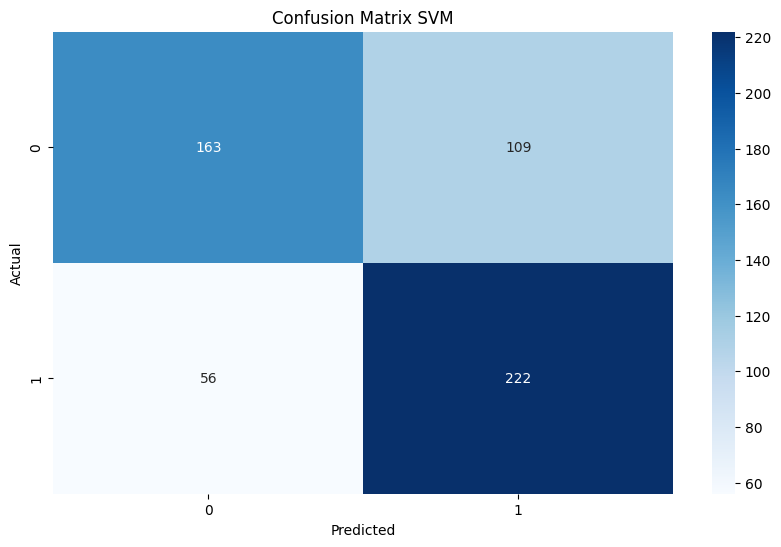

Accuracy  F1_score  Recall  Precision
SVM       0.7     0.729   0.799      0.671

In [ ]:
conf_matrix_svm = confusion_matrix(y_val, y_svm_pred)

print(f'Accuracy SVM: {accuracy_svm}')
print('Classification Report SVM:\n', report_svm)
print('Confusion Matrix SVM:\n', conf_matrix_svm)

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()
df_rf=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_rf

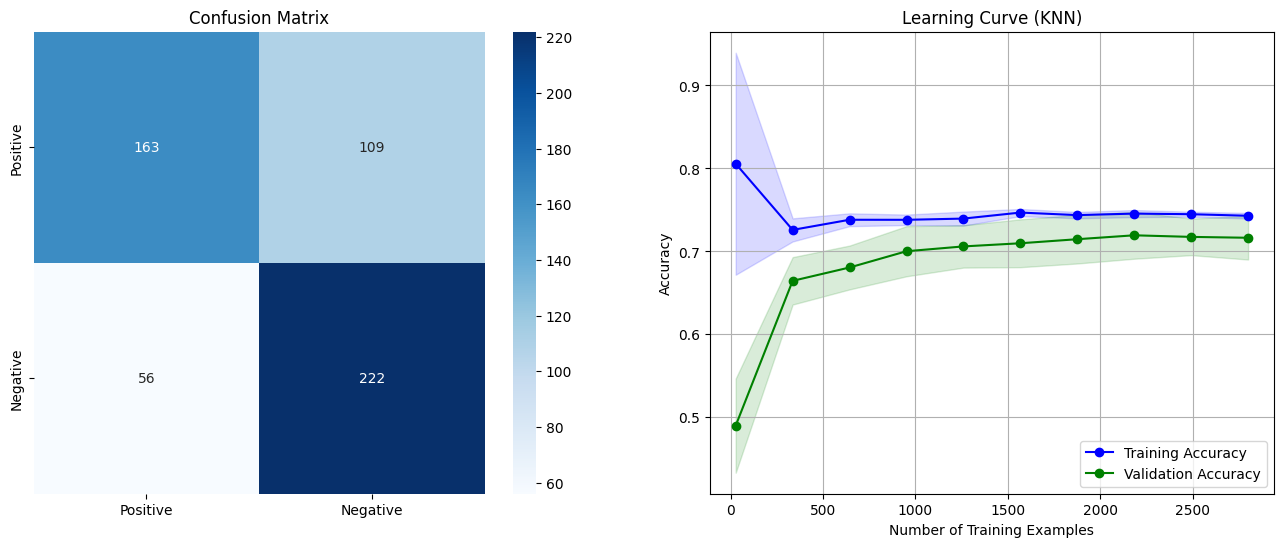

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## Podsumowanie

In [ ]:
# result = pd.concat([df_lr,df_kn, df_tree, df_rf, df_svm])
# result

In [ ]:
# print("Projekt końcowy")